In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

### Načteme data

In [3]:
housing = fetch_california_housing()

In [4]:
housing.data.shape

(20640, 8)

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Jedná se o zjednodušený housing dataset, nejsou v něm už chybějící hodnoty nebo kategorické proměnné.

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Vytvoříme model

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [12]:
model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=["mean_absolute_error"])

In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 3.1576 - mean_absolute_error: 1.1461 - val_loss: 2.8833 - val_mean_absolute_error: 0.5762
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5035 - mean_absolute_error: 0.5063 - val_loss: 2.3839 - val_mean_absolute_error: 0.4996
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4522 - mean_absolute_error: 0.4720 - val_loss: 1.9448 - val_mean_absolute_error: 0.4833
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4192 - mean_absolute_error: 0.4555 - val_loss: 2.0715 - val_mean_absolute_error: 0.4804
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3946 - mean_absolute_error: 0.4477 - val_loss: 1.9066 - val_mean_absolute_error: 0.4639
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3975 - mean_absolute_error: 0.4428 - val_loss: 1.8461 - val_mean_absolute_error: 0.4592
Epoch 7/20
363/3

(0.0, 1.0)

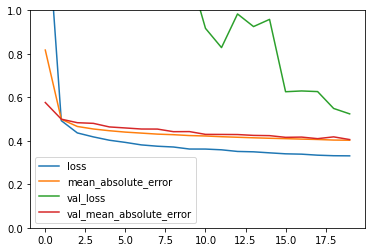

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.gca().set_ylim(0,1)

### Ověříme na testovacích datech

In [15]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1.3398 - mean_absolute_error: 0.4193


[1.3397762775421143, 0.4192507266998291]

In [16]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.6902551],
       [0.588663 ],
       [0.9145379]], dtype=float32)

**Pokračování viz prezentace**

### Early Stopping

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1),
])

In [18]:
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [19]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [20]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 2.4648 - val_loss: 0.8978
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4216 - val_loss: 0.4166
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3611 - val_loss: 0.7238
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3548 - val_loss: 0.4066
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3529 - val_loss: 0.3485
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3292 - val_loss: 0.5610
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3348 - val_loss: 0.3681
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3352 - val_loss: 0.3315
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3287 - val_loss: 0.3258
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3096 - val_lo

<AxesSubplot:>

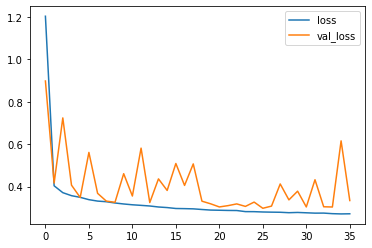

In [21]:
pd.DataFrame(history.history).plot()

**Pokračování viz prezentace**